In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy as sp
import pandas as pd
from pandas.io.json import json_normalize
import json
import datetime
import statsmodels.api as sm

array([[1.50000e+01],
       [5.00000e+00],
       [6.00000e+00],
       [9.00000e+00],
       [8.00000e+00],
       [3.00000e+00],
       [5.39300e+03],
       [8.05400e+03],
       [9.93100e+03],
       [1.55390e+04],
       [1.54660e+04],
       [2.24950e+04],
       [1.48920e+04],
       [2.07930e+04],
       [2.01980e+04],
       [2.09900e+04],
       [1.64240e+04],
       [7.00800e+03],
       [1.44650e+04],
       [2.13020e+04],
       [2.15980e+04],
       [2.20960e+04],
       [2.30540e+04],
       [2.41880e+04],
       [2.57750e+04],
       [2.49170e+04],
       [2.88740e+04],
       [3.07360e+04],
       [2.47700e+04],
       [2.53410e+04],
       [2.60780e+04],
       [2.68970e+04],
       [2.65410e+04],
       [2.51040e+04],
       [2.68320e+04],
       [2.54370e+04],
       [2.88630e+04],
       [2.95400e+04],
       [2.99750e+04],
       [2.74940e+04],
       [3.04610e+04],
       [2.79660e+04],
       [3.08310e+04],
       [3.57900e+04],
       [3.38040e+04],
       [3.

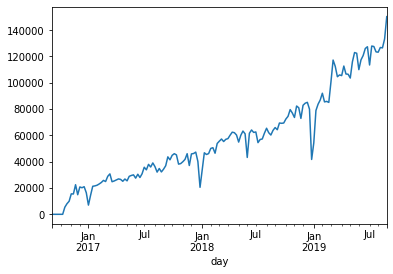

In [6]:
def convert_datetime(name):
    json = pd.read_json('data/downloads/' + name + '_download.json')
    df_json = pd.DataFrame(json['downloads'])
    df = json_normalize(df_json['downloads'])
    df['day'] = pd.to_datetime(df['day'], infer_datetime_format=True)
    df.index = df['day']
    return df

yarn_df = convert_datetime('yarn')
df_w = round(df.resample(rule="W").mean())
df_w['downloads'].plot()

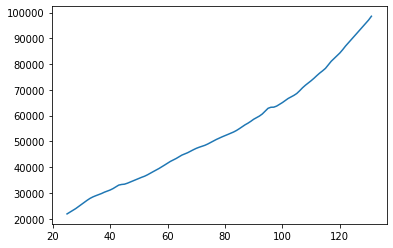

In [24]:
# トレンド
ts = sm.tsa.seasonal_decompose(df_w['downloads'].values, freq=52)
plt.plot(ts.trend)

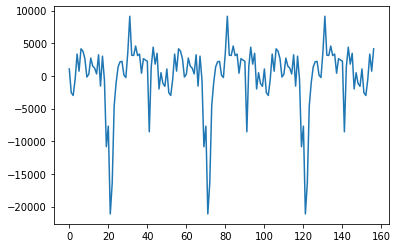

In [25]:
plt.plot(ts.seasonal)

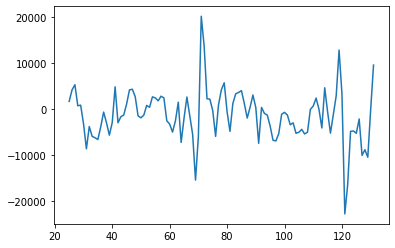

In [26]:
plt.plot(ts.resid)

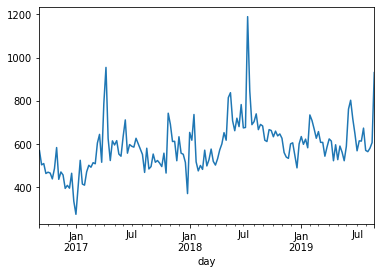

In [30]:

winupdate_df = convert_datetime('npm-windows-upgrade')
winupdate_df_w = round(winupdate_df.resample(rule="W").mean())
winupdate_df_w['downloads'].plot()
win_ts = sm.tsa.seasonal_decompose(winupdate_df_w['downloads'].values, freq=52)

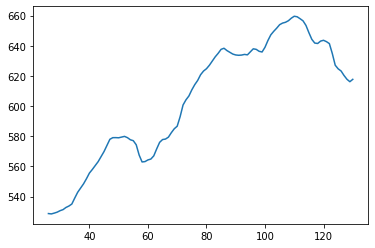

In [31]:
plt.plot(win_ts.trend)

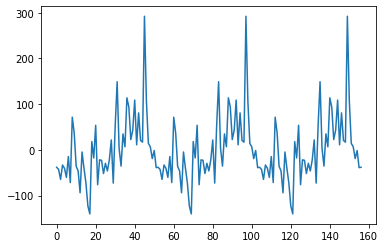

In [32]:
plt.plot(win_ts.seasonal)

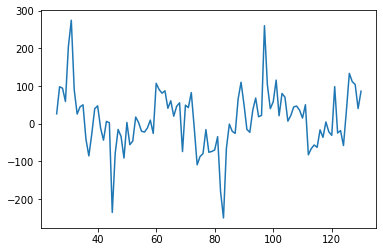

In [29]:
plt.plot(win_ts.resid)
